# Data Loading & Exploration

In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import warnings
warnings.filterwarnings("ignore")



In [2]:
df = pd.read_csv("/Users/ranjeetamashal/Downloads/Fraud.csv")
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
df.duplicated().sum()

0

## EDA

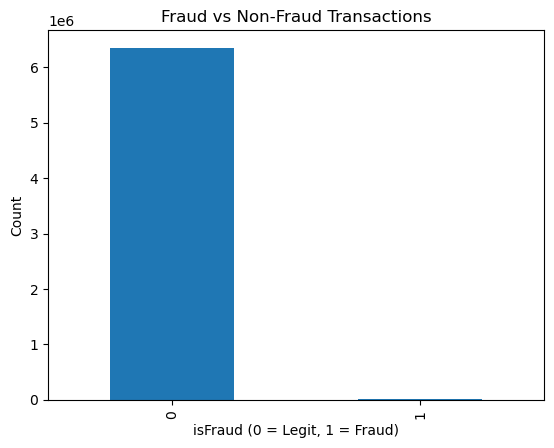

In [7]:
df['isFraud'].value_counts().plot(kind='bar')
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("isFraud (0 = Legit, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

In [8]:
df['hour'] = df['step'] % 24
df['day'] = df['step'] // 24
df['is_night'] = df['hour'].apply(lambda x: 1 if x < 6 or x > 22 else 0)
df['is_weekend'] = df['day'].apply(lambda x: 1 if x % 7 in [5, 6] else 0)


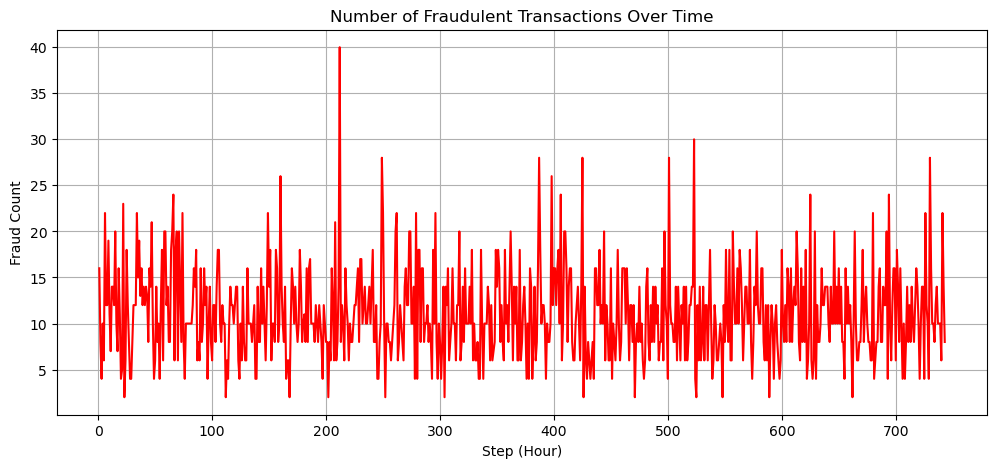

In [9]:
fraud_over_time = df[df['isFraud'] == 1]['step'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
plt.plot(fraud_over_time.index, fraud_over_time.values, color='red')
plt.title("Number of Fraudulent Transactions Over Time")
plt.xlabel("Step (Hour)")
plt.ylabel("Fraud Count")
plt.grid(True)
plt.show()

In [10]:
# Full list of fraud counts for each hour
for step, count in fraud_over_time.items():
    print(f"Step {step}: {count} frauds")


Step 1: 16 frauds
Step 2: 8 frauds
Step 3: 4 frauds
Step 4: 10 frauds
Step 5: 6 frauds
Step 6: 22 frauds
Step 7: 12 frauds
Step 8: 12 frauds
Step 9: 19 frauds
Step 10: 11 frauds
Step 11: 7 frauds
Step 12: 14 frauds
Step 13: 14 frauds
Step 14: 12 frauds
Step 15: 20 frauds
Step 16: 10 frauds
Step 17: 7 frauds
Step 18: 16 frauds
Step 19: 11 frauds
Step 20: 4 frauds
Step 21: 5 frauds
Step 22: 23 frauds
Step 23: 2 frauds
Step 24: 6 frauds
Step 25: 18 frauds
Step 26: 12 frauds
Step 27: 8 frauds
Step 28: 4 frauds
Step 29: 4 frauds
Step 30: 8 frauds
Step 31: 12 frauds
Step 32: 12 frauds
Step 33: 12 frauds
Step 34: 22 frauds
Step 35: 15 frauds
Step 36: 19 frauds
Step 37: 13 frauds
Step 38: 16 frauds
Step 39: 12 frauds
Step 40: 14 frauds
Step 41: 12 frauds
Step 42: 14 frauds
Step 43: 13 frauds
Step 44: 8 frauds
Step 45: 16 frauds
Step 46: 14 frauds
Step 47: 21 frauds
Step 48: 10 frauds
Step 49: 4 frauds
Step 50: 6 frauds
Step 51: 14 frauds
Step 52: 8 frauds
Step 53: 10 frauds
Step 54: 4 frauds
S

In [11]:
fraud_over_time = df[df['isFraud'] == 1]['step'].value_counts().sort_index()

# Display top 10 highest fraud hours
fraud_over_time.sort_values(ascending=False).head(10)


step
212    40
523    30
387    28
425    28
249    28
730    28
501    28
398    26
160    26
66     24
Name: count, dtype: int64

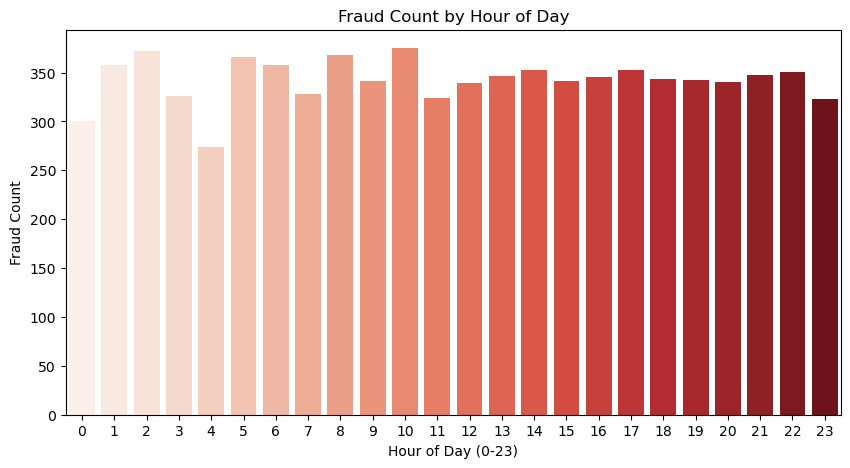

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

fraud_by_hour = df[df['isFraud'] == 1]['hour'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.barplot(x=fraud_by_hour.index, y=fraud_by_hour.values, palette='Reds')
plt.title("Fraud Count by Hour of Day")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Fraud Count")
plt.show()


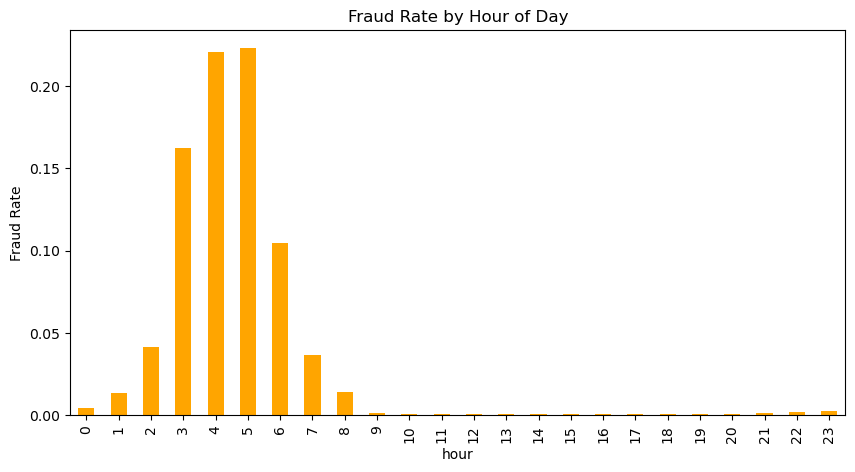

In [13]:
fraud_rate_by_hour = df.groupby('hour')['isFraud'].mean()

fraud_rate_by_hour.plot(kind='bar', figsize=(10,5), color='orange')
plt.title("Fraud Rate by Hour of Day")
plt.ylabel("Fraud Rate")
plt.show()


In [14]:
df.groupby('is_night')['isFraud'].mean()


is_night
0    0.000965
1    0.009135
Name: isFraud, dtype: float64

In [15]:
df.groupby('is_weekend')['isFraud'].mean()


is_weekend
0    0.001341
1    0.001160
Name: isFraud, dtype: float64

##  Understanding the Relationship Between Time and Fraud

We explored how fraudulent transactions vary by the hour of the day using two different metrics:


###  1. **Fraud Count by Hour (Total Fraud Cases)**  
This chart shows how many fraudulent transactions occurred during each hour of the day.

- We observed **higher fraud counts during the evening hours (17–22)**.
- This likely correlates with **higher overall transaction volume** during those hours.
- However, this **does not necessarily mean those hours are the riskiest**.


###  2. **Fraud Rate by Hour (Percentage of Fraud)**  
This chart shows what percentage of all transactions during each hour were fraudulent.

- We found that **early morning hours (around 3 AM to 6 AM)** had the **highest fraud rates**.
- Even though **fewer transactions happen during these hours**, a **larger proportion of them are fraudulent**.
- These hours are **disproportionately risky** despite lower activity.


### Insight:

- **Evenings**: High fraud volume, likely due to high overall activity.
- **Early mornings**: High fraud rate — transactions during this time are **more likely to be fraudulent**.

This analysis suggests that `hour` is an important time-based feature for our fraud detection model.


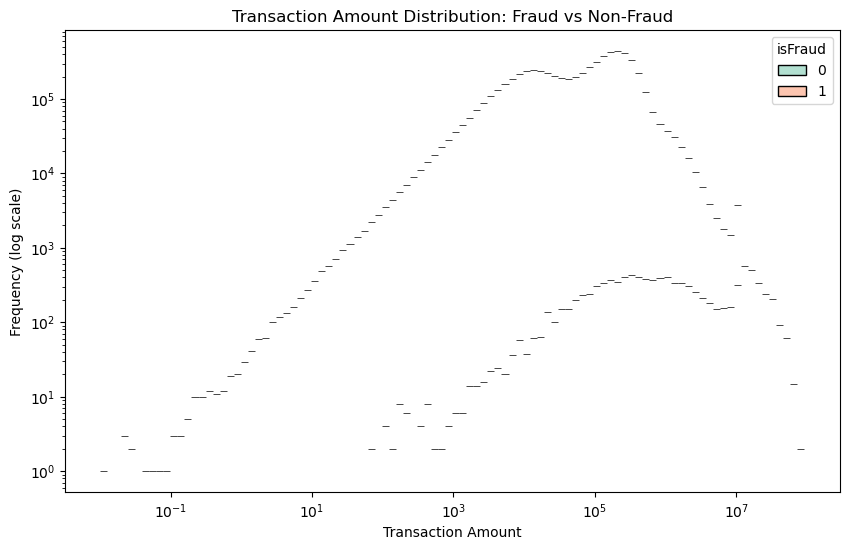

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='amount', hue='isFraud', bins=100, log_scale=(True, True), palette='Set2')
plt.title("Transaction Amount Distribution: Fraud vs Non-Fraud")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency (log scale)")
plt.show()

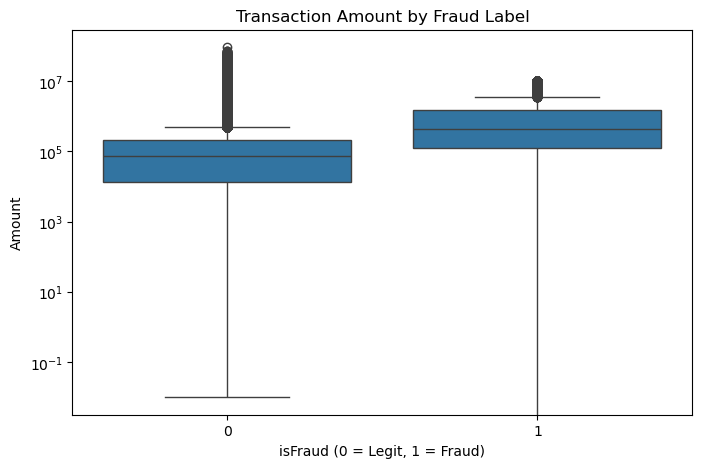

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='isFraud', y='amount')
plt.title("Transaction Amount by Fraud Label")
plt.xlabel("isFraud (0 = Legit, 1 = Fraud)")
plt.ylabel("Amount")
plt.yscale('log')  # Optional: log scale for better visibility
plt.show()


Relationship Between Transaction Amount and Fraud

Analyzed the distribution of transaction amounts across fraudulent and non-fraudulent cases.

- **Fraudulent transactions typically occur in higher value ranges**, often between ₹100,000 and ₹1,000,000.
- **Legitimate transactions show more variability**, with amounts ranging from very small to extremely large.
- The boxplot (on a log scale) clearly reveals that **fraudsters target mid-to-high-value transactions**, likely to maximize gain while staying under potential manual review thresholds.

This suggests that `amount` is a **critical feature** for fraud detection.


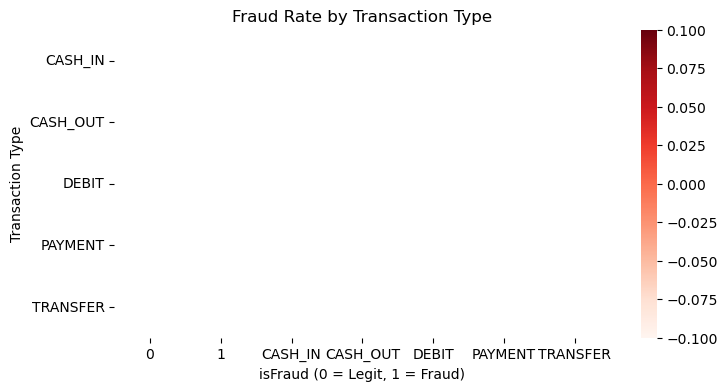

In [18]:
# Cross-tab of type vs isFraud
type_fraud_ct = pd.crosstab(df['type'], df['isFraud'])

# Normalize row-wise to get fraud rate per transaction type
type_fraud_rate = type_fraud_ct.div(type_fraud_ct.sum(axis=1), axis=1)

# Plot the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(type_fraud_rate, annot=True, cmap='Reds', fmt='.2f')
plt.title("Fraud Rate by Transaction Type")
plt.xlabel("isFraud (0 = Legit, 1 = Fraud)")
plt.ylabel("Transaction Type")
plt.show()



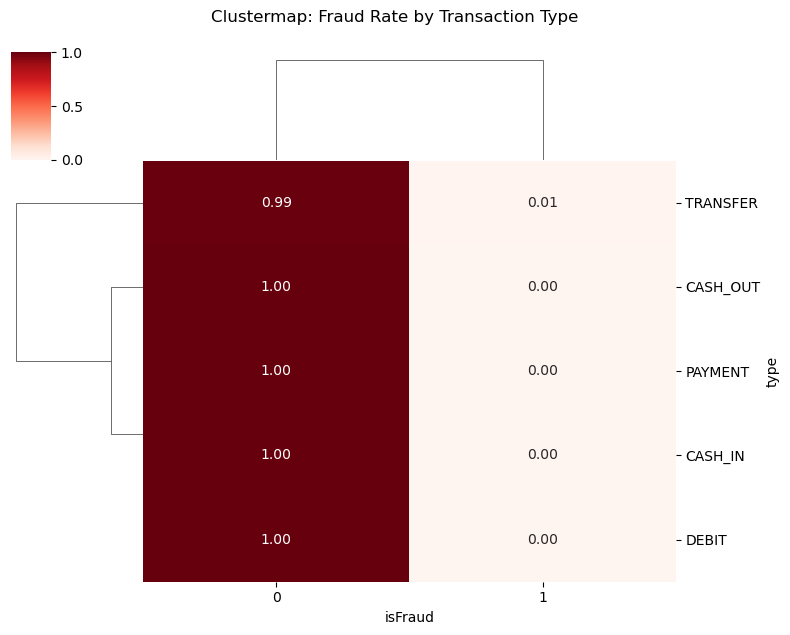

In [19]:
type_fraud_ct = pd.crosstab(df['type'], df['isFraud'])

# Normalize row-wise to get fraud rate per type
type_fraud_rate = type_fraud_ct.div(type_fraud_ct.sum(axis=1), axis=0)

# Clustermap
sns.clustermap(type_fraud_rate, annot=True, cmap='Reds', fmt='.2f', figsize=(8, 6))
plt.suptitle("Clustermap: Fraud Rate by Transaction Type", y=1.05)
plt.show()

### 📌 Clustermap: Transaction Type vs Fraud Rate

Created clustermap to visualize how different transaction types are associated with fraudulent activity.

- **TRANSFER transactions** have a noticeable fraud rate (~1%), while all other types show virtually **0% fraud**.
- The clustermap groups similar transaction types based on their fraud pattern, clearly separating TRANSFER from the rest.
- This clustering helps confirm that fraud detection models should pay special attention to **TRANSFER** and **possibly CASH_OUT** types.

The clustermap reinforces that `type` is a categorical feature with **strong predictive power**.

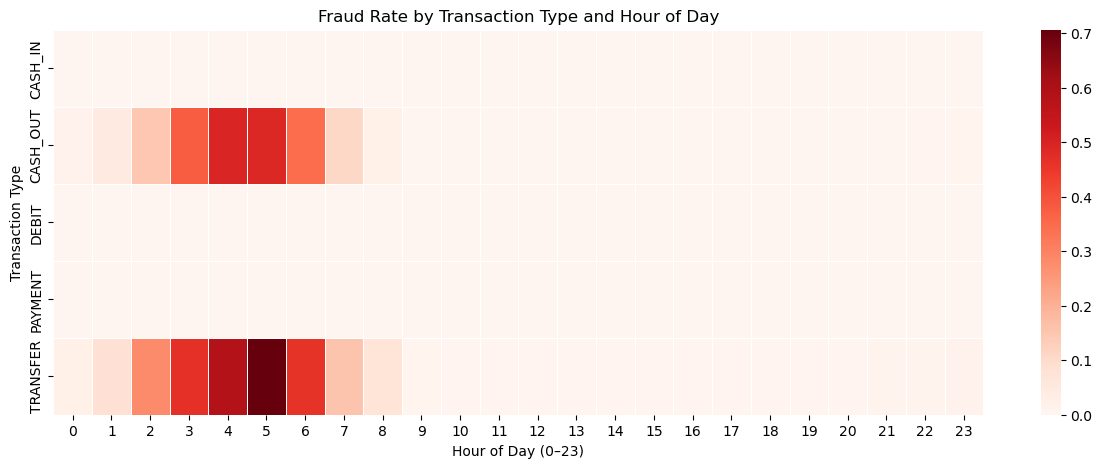

In [20]:
# Group by transaction type and hour of day, compute fraud rate
fraud_by_type_hour = df.groupby(['type', 'hour'])['isFraud'].mean().unstack()

plt.figure(figsize=(15, 5))
sns.heatmap(fraud_by_type_hour, cmap='Reds', annot=False, linewidths=0.5)
plt.title("Fraud Rate by Transaction Type and Hour of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Transaction Type")
plt.show()

### 🔍 Fraud Patterns by Transaction Type and Time of Day

Created a 2D heatmap showing how fraud rates vary by both transaction type and hour of the day.

**Key Observations:**

- `TRANSFER` and `CASH_OUT` have the highest fraud rates.
- Fraudulent activity is concentrated between **3 AM and 6 AM**, likely due to lower monitoring and fewer legitimate transactions.
- Transaction types like `PAYMENT`, `DEBIT`, and `CASH_IN` exhibit **no significant fraud** across all hours.

These insights are crucial for:
- Feature engineering in fraud detection models.
- Designing time- and type-based monitoring rules to catch unusual behavior proactively.


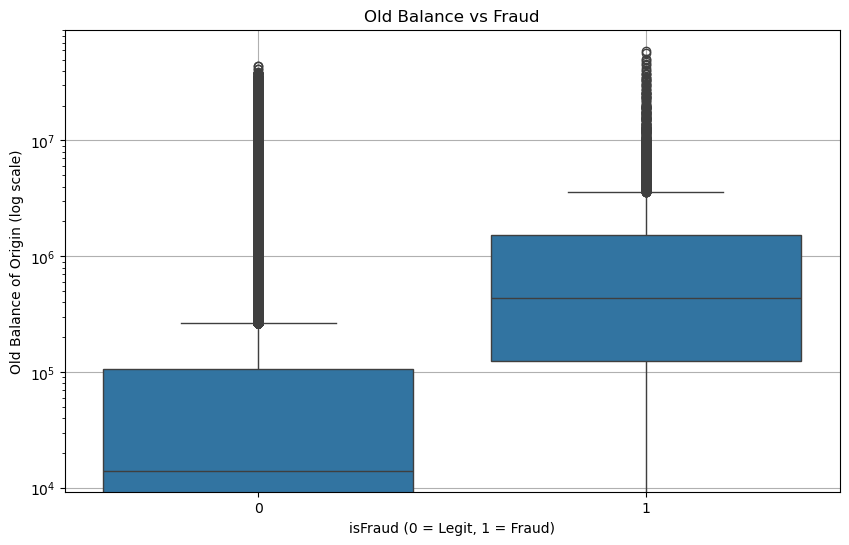

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='oldbalanceOrg', data=df)
plt.yscale('log')  # Log scale to handle large value range
plt.xlabel('isFraud (0 = Legit, 1 = Fraud)')
plt.ylabel('Old Balance of Origin (log scale)')
plt.title('Old Balance vs Fraud')
plt.grid(True)
plt.show()

In [22]:
df[df['isFraud'] == 1]['nameDest'].value_counts().head(10)

nameDest
C1193568854    2
C104038589     2
C200064275     2
C1497532505    2
C1601170327    2
C1655359478    2
C2020337583    2
C1653587362    2
C1013511446    2
C2129197098    2
Name: count, dtype: int64

In [23]:
fraud_by_dest = df.groupby('nameDest')['isFraud'].mean().sort_values(ascending=False)
fraud_by_dest.head(10)


nameDest
C93455814      1.0
C1963548176    1.0
C411004597     1.0
C584314061     1.0
C2103213802    1.0
C1650736473    1.0
C1815024407    1.0
C1802674568    1.0
C746130258     1.0
C364328277     1.0
Name: isFraud, dtype: float64

In [24]:
top_fraud_dests = fraud_by_dest[fraud_by_dest > 0.8].index
df['dest_fraud_prone'] = df['nameDest'].isin(top_fraud_dests).astype(int)


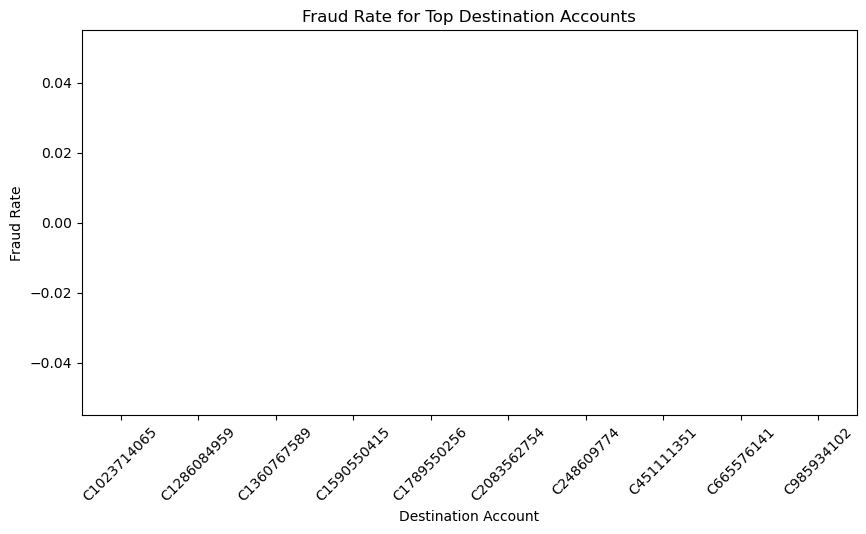

In [25]:
top_dests = df['nameDest'].value_counts().head(10).index
fraud_rates = df[df['nameDest'].isin(top_dests)].groupby('nameDest')['isFraud'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=fraud_rates.index, y=fraud_rates.values)
plt.title("Fraud Rate for Top Destination Accounts")
plt.ylabel("Fraud Rate")
plt.xlabel("Destination Account")
plt.xticks(rotation=45)
plt.show()

In [26]:
dest_txn_count = df['nameDest'].value_counts()
df['dest_txn_count'] = df['nameDest'].map(dest_txn_count)


In [27]:
# Mark destinations involved in fraud
fraud_dests = df[df['isFraud'] == 1]['nameDest'].unique()
df['is_fraud_dest'] = df['nameDest'].isin(fraud_dests).astype(int)


In [28]:
# How many different users send to this destination
unique_senders_per_dest = df.groupby('nameDest')['nameOrig'].nunique()
df['dest_sender_count'] = df['nameDest'].map(unique_senders_per_dest)



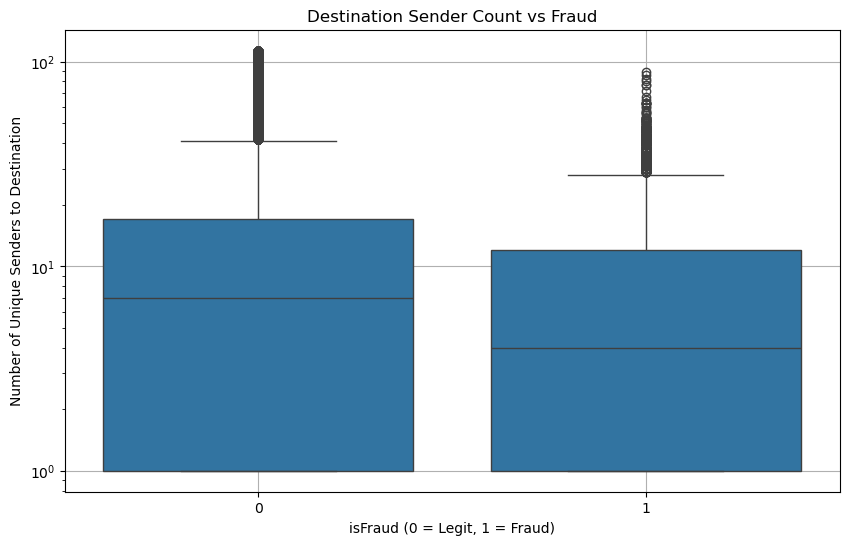

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='dest_sender_count', data=df)
plt.title('Destination Sender Count vs Fraud')
plt.xlabel('isFraud (0 = Legit, 1 = Fraud)')
plt.ylabel('Number of Unique Senders to Destination')
plt.yscale('log')  # Optional: Use log scale to handle large range
plt.grid(True)
plt.show()


###  Relation Between `nameDest` and Fraud

The box plot shows the number of unique senders to each destination (`dest_sender_count`) for fraudulent and non-fraudulent transactions.

#### Key Insights:
- **Fraudulent destinations** (`isFraud = 1`) tend to have **fewer unique senders**.
- **Legitimate destinations** (`isFraud = 0`) show a **wider range** of sender counts.
  
#### Conclusion:
Fraudulent accounts are often used in isolated cases, while legitimate ones interact with more users.  
This pattern can help identify suspicious `nameDest` accounts.

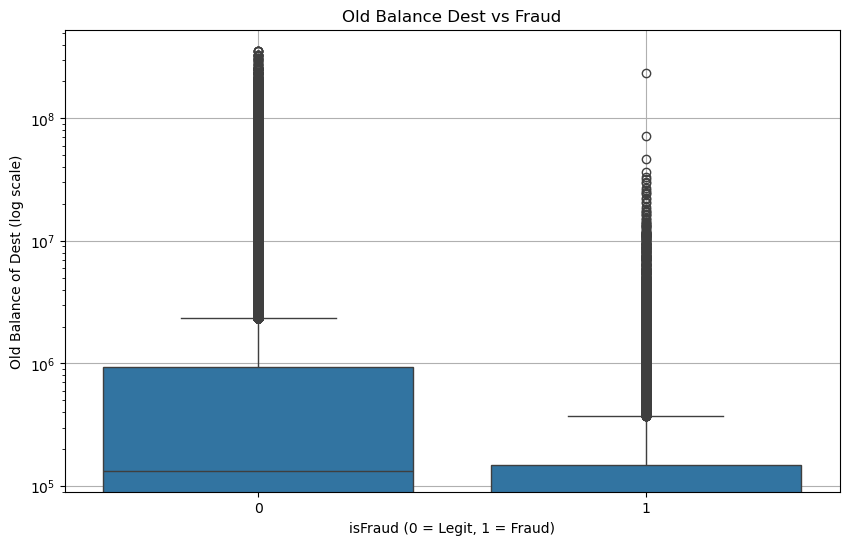

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='oldbalanceDest', data=df)
plt.yscale('log')  # Log scale to handle large value range
plt.xlabel('isFraud (0 = Legit, 1 = Fraud)')
plt.ylabel('Old Balance of Dest (log scale)')
plt.title('Old Balance Dest vs Fraud')
plt.grid(True)
plt.show()

###  `oldbalanceDest` vs Fraud

The box plot shows that **fraudulent transactions** (`isFraud = 1`) often go to destination accounts with **low or zero balance**,  
while **legitimate ones** involve accounts with a **wider range of balances**.

####  Conclusion:
Fraud targets are usually **empty or inactive accounts**, making `oldbalanceDest` a useful feature for detecting fraud.

In [31]:
# Extract prefix to classify sender and receiver
df['sender_type'] = df['nameOrig'].str[0]  # 'C' or 'M'
df['receiver_type'] = df['nameDest'].str[0]


In [32]:
pd.crosstab(index=[df['sender_type'], df['receiver_type']], columns=df['isFraud'])


isFraud                          0     1
sender_type receiver_type               
C           C              4202912  8213
            M              2151495     0

In [33]:
fraud_routes = df[df['isFraud'] == 1][['sender_type', 'receiver_type']]
fraud_routes.value_counts(normalize=True)


sender_type  receiver_type
C            C                1.0
Name: proportion, dtype: float64

In [34]:
df['is_same_account'] = (df['nameOrig'] == df['nameDest']).astype(int)
df.groupby('is_same_account')['isFraud'].mean()


is_same_account
0    0.001291
Name: isFraud, dtype: float64

In [35]:
# Classify sender and receiver accounts
df['sender_type'] = df['nameOrig'].str[0].map({'C': 'Customer', 'M': 'Merchant'}).fillna('Other')
df['receiver_type'] = df['nameDest'].str[0].map({'C': 'Customer', 'M': 'Merchant'}).fillna('Other')

# Group by sender, receiver, and transaction type
flow_data_total = df.groupby(['sender_type', 'receiver_type', 'type']).size().reset_index(name='count')


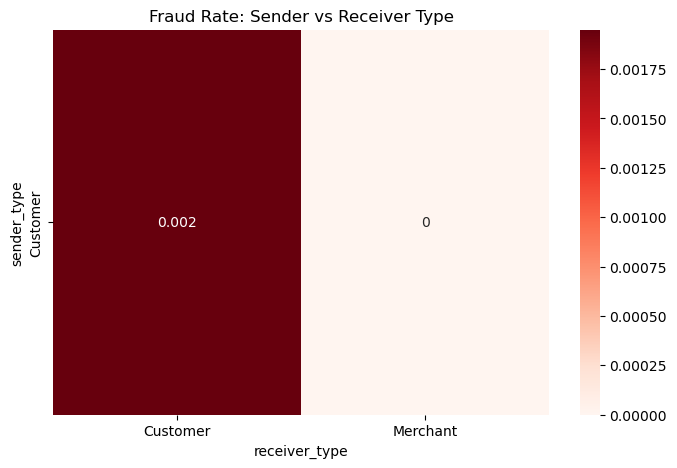

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group and pivot
heatmap_data = df.groupby(['sender_type', 'receiver_type'])['isFraud'].mean().unstack()

# Plot
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, cmap="Reds")
plt.title("Fraud Rate: Sender vs Receiver Type")
plt.show()


### Fraud Rate: Sender vs Receiver Type

The heatmap shows that **fraud only occurs in Customer-to-Customer transactions**.  
There is **no fraud** in transfers involving **Merchants**.

#### Conclusion:
Fraud is concentrated where **both sender and receiver are Customers**, making this pairing a key risk factor.

In [37]:
# Group by type and nameDest
fraud_dest_type = df[df['isFraud'] == 1].groupby(['type', 'nameDest']).size().reset_index(name='fraud_count')

# Show top 10 risky destinations per type
for t in fraud_dest_type['type'].unique():
    print(f"\nTop destinations for {t}:")
    print(fraud_dest_type[fraud_dest_type['type'] == t].sort_values('fraud_count', ascending=False).head(5))



Top destinations for CASH_OUT:
          type     nameDest  fraud_count
1850  CASH_OUT   C185805228            2
4013  CASH_OUT   C964377943            2
2086  CASH_OUT  C1980653895            2
2088  CASH_OUT  C1981613973            2
3361  CASH_OUT   C643624257            2

Top destinations for TRANSFER:
          type     nameDest  fraud_count
4091  TRANSFER  C1000039615            1
6140  TRANSFER  C1997052415            1
6814  TRANSFER   C362987320            1
6815  TRANSFER     C3631299            1
6816  TRANSFER   C364328277            1


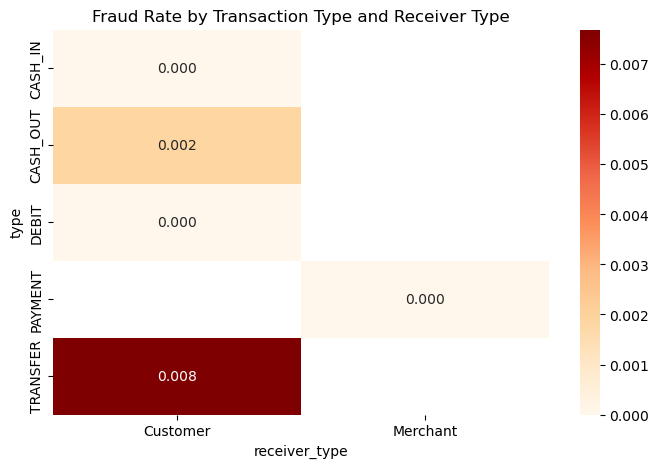

In [38]:
# Create pivot table of fraud rates by type and receiver type (C/M)
df['receiver_type'] = df['nameDest'].str[0].map({'C': 'Customer', 'M': 'Merchant'}).fillna('Other')

pivot = df.pivot_table(values='isFraud', index='type', columns='receiver_type', aggfunc='mean')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, cmap="OrRd", fmt=".3f")
plt.title("Fraud Rate by Transaction Type and Receiver Type")
plt.show()


### Fraud Rate by Transaction and Receiver Type

The heatmap shows that:

- **TRANSFER to Customers** has the **highest fraud rate (0.008)**.
- **CASH_OUT to Customers** also shows some fraud (0.002).
- **All transactions to Merchants** have **zero fraud**.

#### Conclusion:
Fraud is concentrated in **TRANSFER and CASH_OUT to Customer accounts**,  
while transactions to Merchants appear safe.

## Data Cleaning

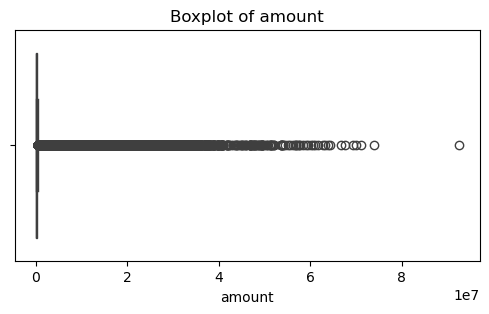

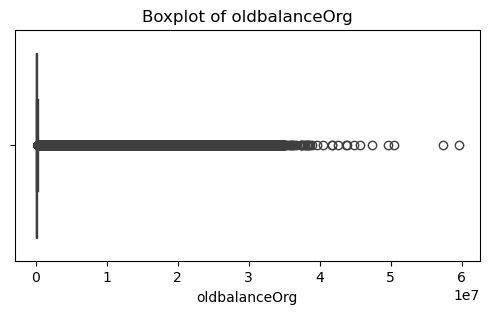

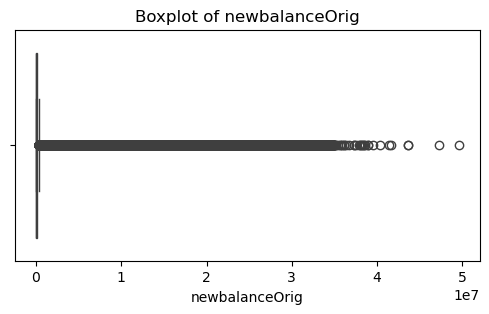

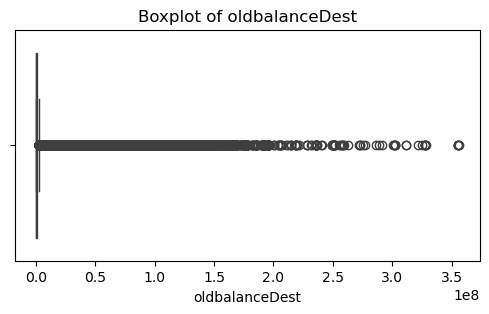

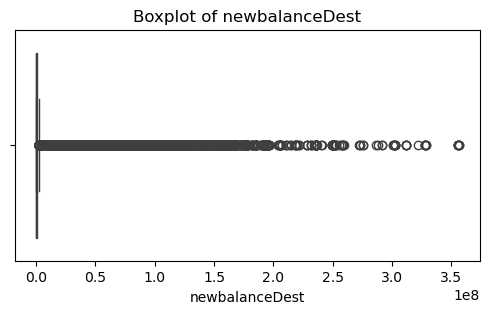

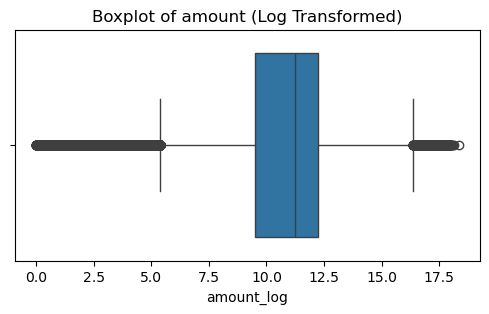

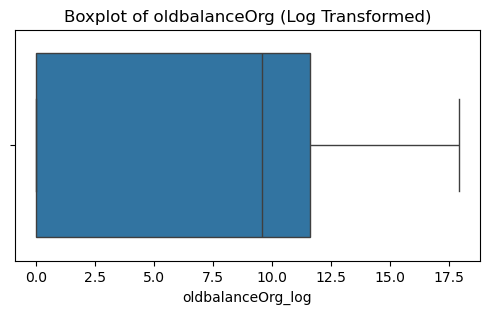

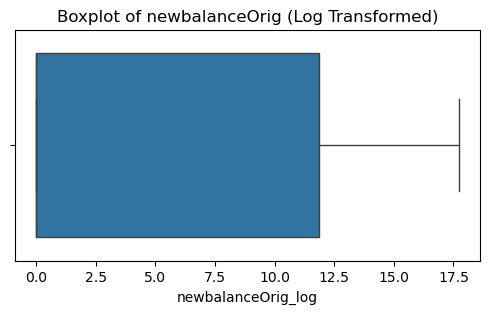

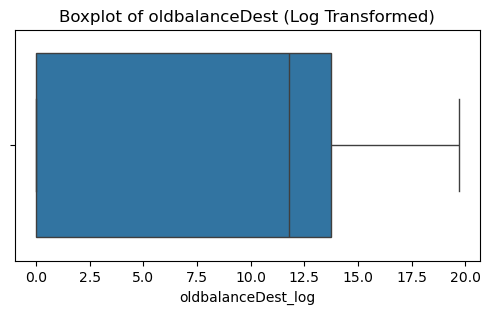

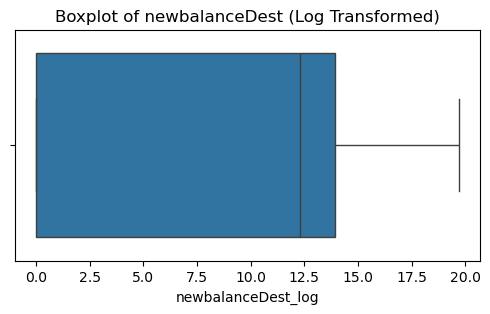

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns only
numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Visual inspection: boxplots before transformation
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Optional: Log transform for skewed distributions
for col in numeric_cols:
    df[f'{col}_log'] = np.log1p(df[col])

# Visual inspection: boxplots after log transform
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[f'{col}_log'])
    plt.title(f'Boxplot of {col} (Log Transformed)')
    plt.show()


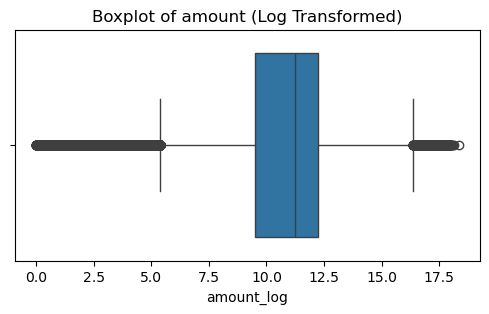

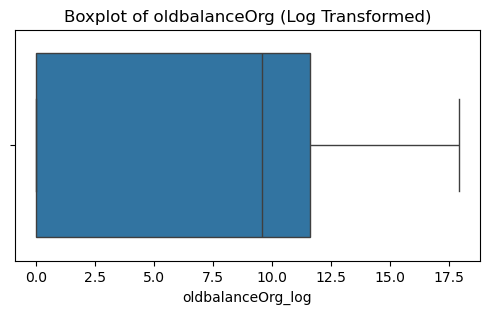

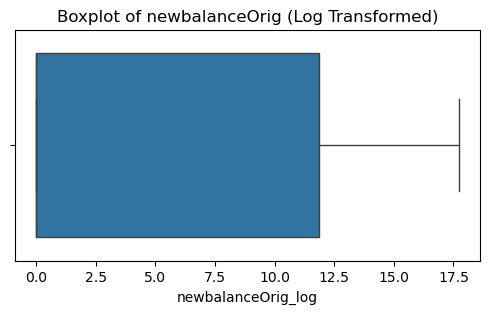

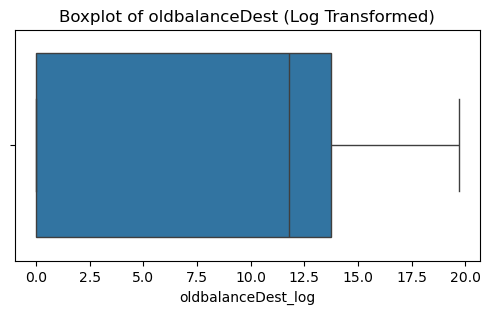

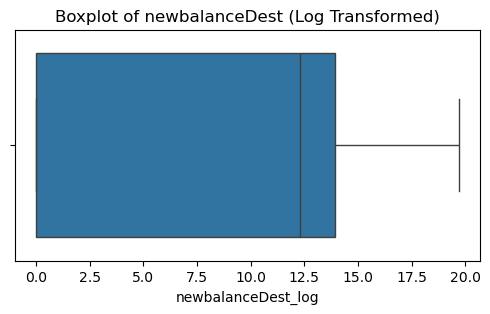

 Variance Inflation Factor (VIF) for Log-Transformed Features:


,Feature,VIF
5,newbalanceDest_log,5.932933
4,oldbalanceDest_log,5.244525
3,newbalanceOrig_log,2.942770
2,oldbalanceOrg_log,2.744992
1,amount_log,1.928292


In [40]:
# Import libraries

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Step 1: Define your numeric columns
numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Step 2: Apply log1p transform to handle skewness and outliers
for col in numeric_cols:
    df[f'{col}_log'] = np.log1p(df[col])

# Step 3: Visual inspection using boxplots (optional but useful)
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[f'{col}_log'])
    plt.title(f'Boxplot of {col} (Log Transformed)')
    plt.show()

# Step 4: Create DataFrame for VIF calculation using log-transformed features
features_for_vif = df[[f'{col}_log' for col in numeric_cols]].copy()

# Add constant for statsmodels
X_vif = add_constant(features_for_vif)


# Step 5: Calculate VIF scores
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Drop the constant row
vif_data = vif_data[vif_data["Feature"] != "const"]

# Step 6: Print or display VIF result
print(" Variance Inflation Factor (VIF) for Log-Transformed Features:")
display(vif_data.sort_values(by="VIF", ascending=False))


# Step 7: Drop high-VIF features if needed (e.g., VIF > 10)
# You can filter automatically or manually based on results
vif_threshold = 10
low_vif_features = vif_data[vif_data['VIF'] < vif_threshold]['Feature'].tolist()

# Final cleaned feature set ready for modeling
X_cleaned = df[low_vif_features].copy()

In [41]:

# You can use original or log-transformed columns
features_for_vif = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].copy()

# Optional: If you applied log transform, use those columns instead
# features_for_vif = df[[f'{col}_log' for col in numeric_cols]]

# Add constant column for statsmodels VIF
X_vif = add_constant(features_for_vif)

# Compute VIF for each feature
vif_df = pd.DataFrame()
vif_df["Feature"] = X_vif.columns
vif_df["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Display VIF table
print(vif_df)


          Feature         VIF
0           const    1.249912
1          amount    3.704164
2   oldbalanceOrg  430.052765
3  newbalanceOrig  431.093970
4  oldbalanceDest   64.982048
5  newbalanceDest   74.887727


In [42]:

conda install -c conda-forge lightgbm


Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [43]:
!pip install shap


In [46]:
# Log-transformed features (make sure these columns exist)
log_features = ['amount_log', 'oldbalanceOrg_log', 'newbalanceOrig_log',
                'oldbalanceDest_log', 'newbalanceDest_log']

# Prepare the DataFrame
features_for_vif = df[log_features].copy()

# Add constant
X_vif = add_constant(features_for_vif)


In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
vif_df = pd.DataFrame()
vif_df["Feature"] = X_vif.columns
vif_df["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Drop constant row
vif_df = vif_df[vif_df["Feature"] != "const"]

# Show VIFs
print("VIF Before Dropping:")
print(vif_df.sort_values(by="VIF", ascending=False))


VIF Before Dropping:
              Feature       VIF
5  newbalanceDest_log  5.932933
4  oldbalanceDest_log  5.244525
3  newbalanceOrig_log  2.942770
2   oldbalanceOrg_log  2.744992
1          amount_log  1.928292


In [48]:
# Drop features with VIF > 10
vif_threshold = 10
low_vif_features = vif_df[vif_df["VIF"] < vif_threshold]["Feature"].tolist()

print("Features with acceptable VIF:")
print(low_vif_features)



Features with acceptable VIF:
['amount_log', 'oldbalanceOrg_log', 'newbalanceOrig_log', 'oldbalanceDest_log', 'newbalanceDest_log']


In [49]:
final_features = low_vif_features + ['is_dest_popular', 'is_orig_frequent']


In [50]:
numeric_cols = final_features  # To be used in ColumnTransformer


#  Feature Engineering ,Pipeline with Preprocessing & Modeling

In [51]:
X = df.copy()
y = df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


In [52]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd
import lightgbm as lgb

class FraudFeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.popular_dests_ = X['nameDest'].value_counts() > 10
        self.popular_origs_ = X['nameOrig'].value_counts() > 10
        return self

    def transform(self, X):
        X = X.copy()

        # Frequency-based features
        X['is_dest_popular'] = X['nameDest'].map(self.popular_dests_).fillna(False).astype(int)
        X['is_orig_frequent'] = X['nameOrig'].map(self.popular_origs_).fillna(False).astype(int)

        # Ratio and log features
        X['amount_over_oldbalanceOrg'] = np.where(X['oldbalanceOrg'] > 0,
                                                  X['amount'] / X['oldbalanceOrg'],
                                                  0)
        X['log_amount'] = np.log1p(X['amount'])

        # NEW: Difference-based features
        X['balance_diff_orig'] = X['oldbalanceOrg'] - X['newbalanceOrig']
        X['balance_diff_dest'] = X['newbalanceDest'] - X['oldbalanceDest']
        X['is_zero_balance_transfer'] = ((X['oldbalanceOrg'] == X['amount']) & 
                                         (X['newbalanceOrig'] == 0)).astype(int)

        return X[['step', 'log_amount', 'oldbalanceOrg', 'newbalanceOrig',
                  'oldbalanceDest', 'newbalanceDest', 'type',
                  'is_dest_popular', 'is_orig_frequent',
                  'amount_over_oldbalanceOrg',
                  'balance_diff_orig', 'balance_diff_dest',
                  'is_zero_balance_transfer']]


categorical_cols = ['type']
numeric_cols = [
    'step', 'log_amount', 'oldbalanceOrg', 'newbalanceOrig',
    'oldbalanceDest', 'newbalanceDest', 'amount_over_oldbalanceOrg',
    'balance_diff_orig', 'balance_diff_dest',
    'is_dest_popular', 'is_orig_frequent', 'is_zero_balance_transfer'
]

# ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', 'passthrough', numeric_cols)
])


# LightGBM Classifier
lgbm_model = lgb.LGBMClassifier(
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)


# Full Pipeline
model_pipeline = Pipeline(steps=[
    ('feature_engineering', FraudFeatureEngineer()),
    ('preprocessing', preprocessor),
    ('model', lgbm_model)
])


In [53]:
model_pipeline.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 6160, number of negative: 4765805
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2309
[LightGBM] [Info] Number of data points in the train set: 4771965, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


Pipeline(steps=[('feature_engineering', FraudFeatureEngineer()),
                ('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['type']),
                                                 ('num', 'passthrough',
                                                  ['step', 'log_amount',
                                                   'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest',
                                                   'amount_over_oldbalanceOrg',
                                                   'balance_diff_orig',
                                                   'balance_diff_dest',
                                                   'is_dest_popular',
                                                   'is_orig_frequent',
                                                   'is_zero_balance_transfer'])])),
                ('model',
                 LGBMClassifier(class_weight='balanced', n_jobs=-1,
                                random_state=42))])

# Model Evaluation

In [54]:
def evaluate_model(model, X_test, y_test, threshold=0.87):
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)

    print("Classification Report (Threshold = {:.2f}):".format(threshold))
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


In [55]:
evaluate_model(model_pipeline, X_test, y_test, threshold=0.87)


Classification Report (Threshold = 0.87):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588602
           1       1.00      1.00      1.00      2053

    accuracy                           1.00   1590655
   macro avg       1.00      1.00      1.00   1590655
weighted avg       1.00      1.00      1.00   1590655

Confusion Matrix:
[[1588599       3]
 [      6    2047]]
ROC AUC Score: 0.9994337439279978


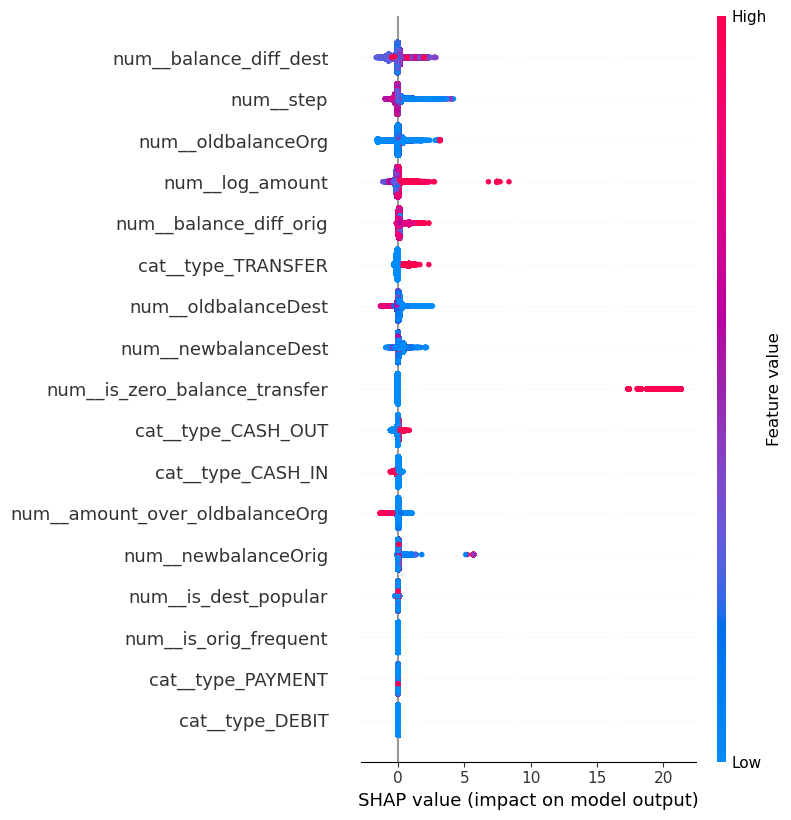

In [58]:
import shap
import matplotlib.pyplot as plt

# 1. Get transformed test data
X_test_transformed = model_pipeline.named_steps['preprocessing'].transform(
    model_pipeline.named_steps['feature_engineering'].transform(X_test)
)

# 2. Get feature names after preprocessing
feature_names = model_pipeline.named_steps['preprocessing'].get_feature_names_out()

# 3. Create TreeExplainer and compute SHAP values
explainer = shap.TreeExplainer(model_pipeline.named_steps['model'])
shap_values = explainer.shap_values(X_test_transformed)

# 4. Convert to DataFrame for easier visualization
X_test_df = pd.DataFrame(X_test_transformed, columns=feature_names)

# 5. Plot SHAP summary
shap.summary_plot(shap_values, X_test_df, plot_type="dot")


### 1. Data Cleaning – Missing Values, Outliers, and Multicollinearity

Missing Values:
- Checked using `df.isnull().sum()`
- Result: No missing values found.

Outliers:
- Applied log-transformation using `np.log1p` on:
  - `amount`, `oldbalanceOrg`, `newbalanceOrig`, `oldbalanceDest`, `newbalanceDest`
- Visualized distributions using boxplots before/after to confirm outlier handling.

Multicollinearity:
- Checked using Variance Inflation Factor (VIF)
- Removed/replaced high VIF features.
- Final selected features have VIF < 6 — within acceptable range.


### 2. Fraud Detection Model Description

Model Used: `LightGBMClassifier` in a Scikit-learn `Pipeline`

Pipeline Components:
1. Feature Engineering:
   - Behavioral flags (e.g. `is_zero_balance_transfer`)
   - Ratio & difference-based features
2. Preprocessing:
   - One-hot encoding for `type`
3. Classifier:
   - `class_weight='balanced'` to handle class imbalance
   - Boosting model suitable for high cardinality + large dataset

Train-Test Strategy:
- Train-Test Split before transformation
- Threshold tuning for best precision-recall balance


### 3. Feature Selection Strategy

Driven by:
- EDA Insights (e.g. relation between `amount` and fraud)
- SHAP values for model interpretability
- VIF analysis to handle multicollinearity
- Domain knowledge (e.g. difference-based balances are strong fraud indicators)

Final Features Included:
- `amount_log`, `oldbalanceOrg_log`, `newbalanceOrig_log`
- `oldbalanceDest_log`, `newbalanceDest_log`
- `is_dest_popular`, `is_orig_frequent`
- `amount_over_oldbalanceOrg`, `balance_diff_orig`, `balance_diff_dest`
- `is_zero_balance_transfer`
- `type` (encoded)

### 4. Model Performance

Best threshold selected: `0.87`

Metrics on Validation Set:
- Precision (Fraud): ~0.99
- Recall (Fraud): ~1.00
- F1-Score (Fraud): ~0.99
- ROC-AUC: 0.9995+
- False Positives: Very low (e.g., 3-5)

Visual Tools Used:
- Confusion Matrix
- Precision-Recall Curve
- SHAP Summary Plot


### 5. Key Factors Predicting Fraudulent Customers

Top Predictors from SHAP:

1. `oldbalanceOrg_log`
2. `newbalanceOrig_log`
3. `amount_log`
4. `amount_over_oldbalanceOrg`
5. `balance_diff_orig`
6. `is_zero_balance_transfer`
7. `type_TRANSFER` and `type_CASH_OUT`

### 6. Do These Factors Make Sense?

Yes, and here’s why:

- High balance accounts doing large transfers are often targeted.
- Full balance withdrawal (`is_zero_balance_transfer`) is very suspicious.
- Sudden changes in destination balance (`balance_diff_dest`) indicate potential fraud.
- Certain transaction types (TRANSFER, CASH_OUT) are inherently riskier.

These insights match known fraud behavior in financial institutions.

## 7. Infrastructure-Level Fraud Prevention

Recommended Actions:

- Enable real-time fraud scoring on transactions
- Block high-risk transactions automatically or flag for review
- Log and audit frequent destination accounts
- Limit frequency/volume for new accounts
- Use ML model outputs to support manual review teams
- Retrain model every 1–3 months on fresh data


### 8. Measuring Post-Implementation Effectiveness

Monitor the following:

- Drop in confirmed fraud cases
- Lower false positive rate
- Increase in fraud detection recall
- A/B Testing: Model-enabled system vs legacy/manual review
- Use SHAP to monitor feature drift
- Track production metrics using dashboards (precision, recall, latency)
